## $\color{red}{\text{Lecture Overview}}$
1. **Separating numeric and categorical data**
2. **Dealing with categorical variables**
    - Dummy variables
3. **Missing value analysis**
    - Imputation for numeric variables
    - Imputation for categorical variables
4. **Merging datasets**

## $\color{red}{\text{Import Data}}$

In [3]:
import missingno as msno
import pandas as pd
nba_df = pd.read_excel('/Users/dB/Documents/repos/github/bint-capstone/notebooks/NBA.xlsx')
hr_df = pd.read_excel('/Users/dB/Documents/repos/github/bint-capstone/notebooks/hrData.xlsx', sheet_name="messyData")

<Axes: >

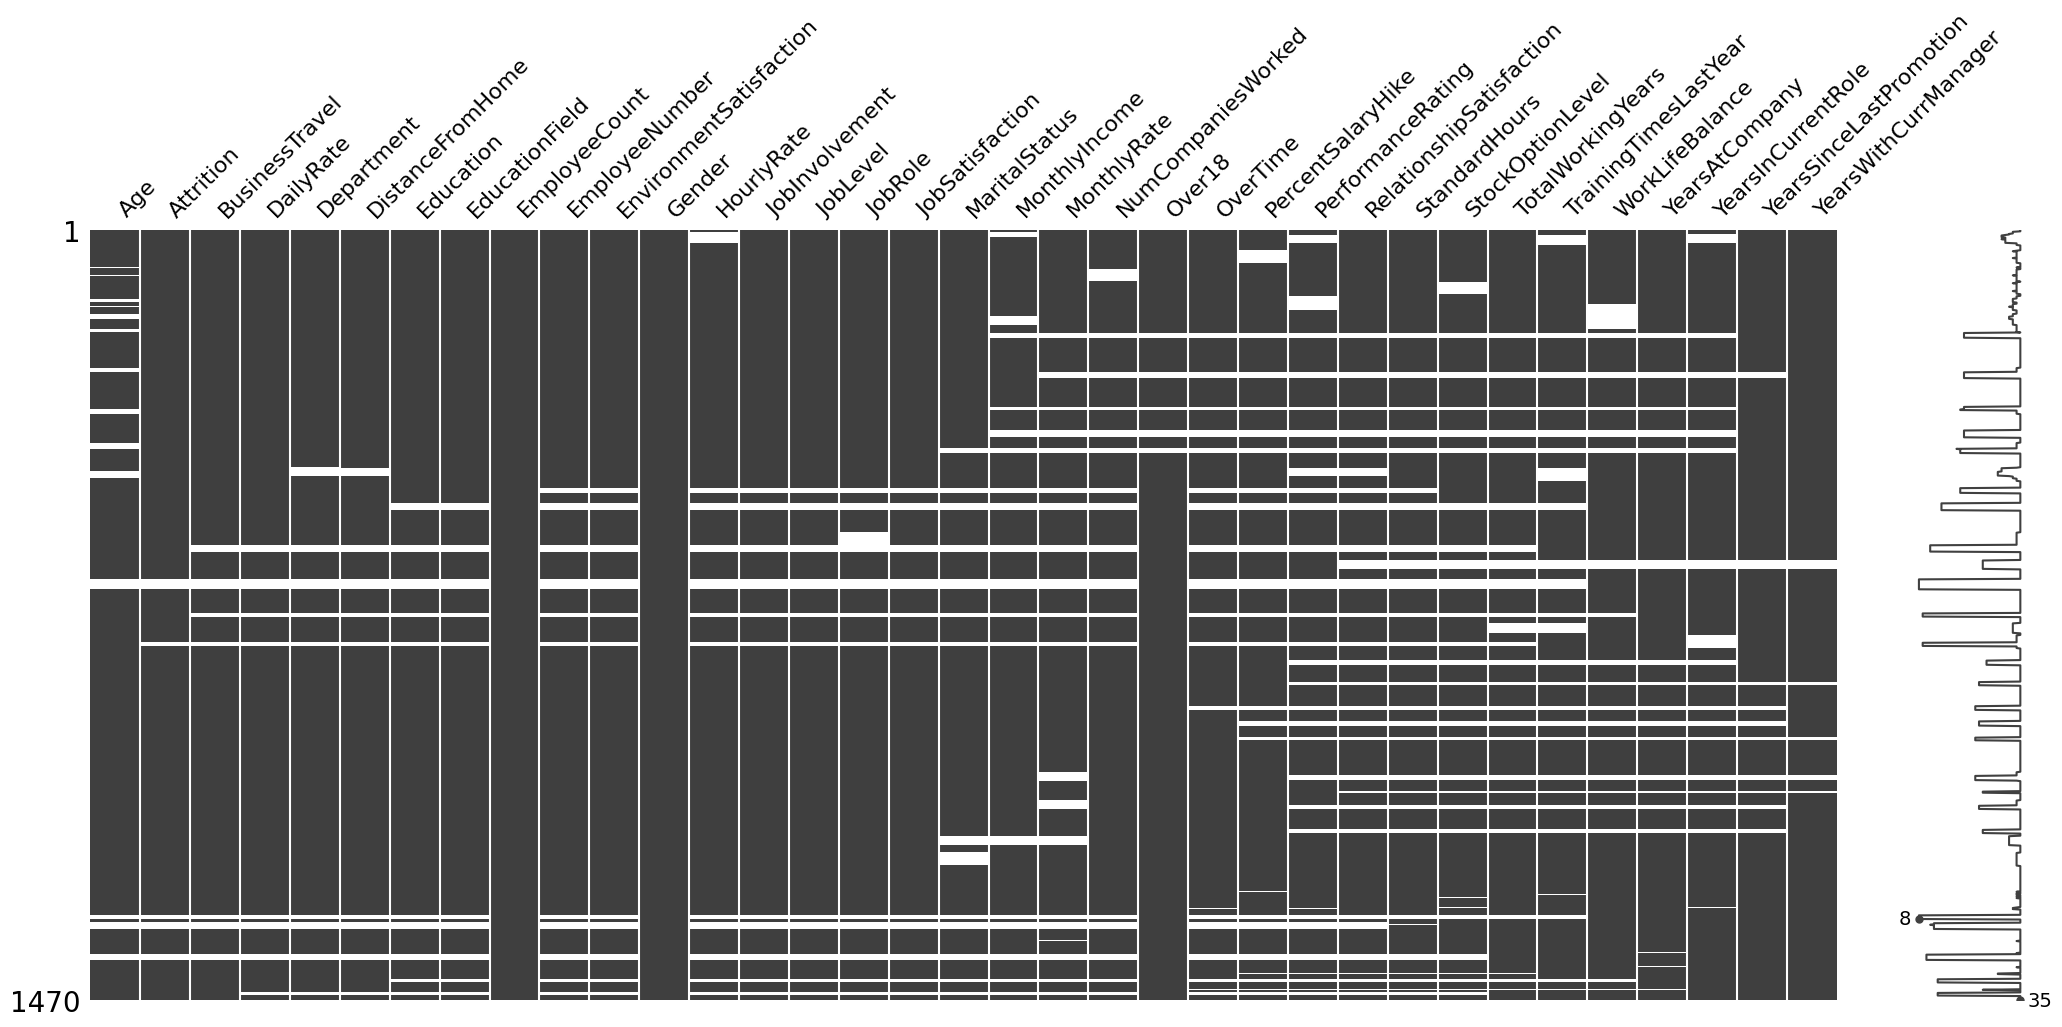

In [4]:
%matplotlib inline
msno.matrix(hr_df)

## $\color{red}{\text{Data Transformation}}$
### $\color{blue}{\text{Separating Numeric and Categorical Data}}$

1. **Techniques for data analysis might be different for numeric and categorical data**
    - Solution is to separate the data according to their numeric or categorical portion
3. **Treatment should be applied differently**

#### $\color{green}{\text{Example 1}}$

1. Separate the HR data into its numeric and categorical components

In [5]:
import numpy as np

# get only numeric data
hr_num = hr_df.select_dtypes(include = np.number)
hr_num.columns.tolist()

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [7]:
# get only categorical data
hr_cat = hr_df.select_dtypes(exclude = np.number)
hr_cat.columns.tolist()

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

## $\color{red}{\text{Data Transformation}}$
### $\color{blue}{\text{Missing Data Analysis: Counting Missing Data}}$

1. **No data is perfect**
    - Some observations may be missing
    - Some may contain alpha-numeric characters <br>
<br>    
2. **Percentage of missing**
    - Useful as an overview of percentage of missing values

In [10]:
# Get an idea of missing data
hr_df.isna().sum()

Age                         126
Attrition                    58
BusinessTravel               78
DailyRate                    84
Department                  100
DistanceFromHome            100
Education                   105
EducationField              105
EmployeeCount                 0
EmployeeNumber              115
EnvironmentSatisfaction     115
Gender                        0
HourlyRate                  137
JobInvolvement              115
JobLevel                    115
JobRole                     139
JobSatisfaction             115
MaritalStatus               167
MonthlyIncome               202
MonthlyRate                 220
NumCompaniesWorked          190
Over18                       52
OverTime                    177
PercentSalaryHike           218
PerformanceRating           290
RelationshipSatisfaction    268
StandardHours               241
StockOptionLevel            255
TotalWorkingYears           232
TrainingTimesLastYear       256
WorkLifeBalance             198
YearsAtC

We need to look at these results in the context of the data. Take the missing 126 entries from the `Age` column. If we have millions of rows, this is inconsequentiall. If we have 150 rows, we are in trouble.

#### $\color{green}{\text{Example 2}}$

1. Compute percentage of missing for ALL variables (numeric and categorical) in the HR data
2. **Comment on it**
    - Which variables have the most missing?
    - Which variables have the least missing?
    - Any reasons why they are missing?

In [16]:
# get missing data as a percentage

# this, for each column, computes the number of missing values. Then we divide that by the length of the columns to show a percentage, and finally sort by highest missing % to lowest.
hr_df.isna().sum().divide(len(hr_df)).sort_values(ascending=False)

PerformanceRating           0.197279
RelationshipSatisfaction    0.182313
TrainingTimesLastYear       0.174150
StockOptionLevel            0.173469
StandardHours               0.163946
TotalWorkingYears           0.157823
MonthlyRate                 0.149660
PercentSalaryHike           0.148299
MonthlyIncome               0.137415
WorkLifeBalance             0.134694
NumCompaniesWorked          0.129252
YearsInCurrentRole          0.120408
OverTime                    0.120408
MaritalStatus               0.113605
JobRole                     0.094558
YearsAtCompany              0.093197
HourlyRate                  0.093197
Age                         0.085714
JobLevel                    0.078231
JobInvolvement              0.078231
EnvironmentSatisfaction     0.078231
EmployeeNumber              0.078231
JobSatisfaction             0.078231
EducationField              0.071429
Education                   0.071429
DistanceFromHome            0.068027
Department                  0.068027
Y

Now that we can see the missing data as a percentage, we can see that for most of the categories there is a relatively inconsequential level of missing data that is presentable. Now let's turn it into a function to allow us to make this process modular.

In [18]:
def show_missing_vals(df:pd.DataFrame)->pd.DataFrame:
    return df.isna().sum().divide(len(df)).sort_values(ascending=False)

show_missing_vals(hr_df)

PerformanceRating           0.197279
RelationshipSatisfaction    0.182313
TrainingTimesLastYear       0.174150
StockOptionLevel            0.173469
StandardHours               0.163946
TotalWorkingYears           0.157823
MonthlyRate                 0.149660
PercentSalaryHike           0.148299
MonthlyIncome               0.137415
WorkLifeBalance             0.134694
NumCompaniesWorked          0.129252
YearsInCurrentRole          0.120408
OverTime                    0.120408
MaritalStatus               0.113605
JobRole                     0.094558
YearsAtCompany              0.093197
HourlyRate                  0.093197
Age                         0.085714
JobLevel                    0.078231
JobInvolvement              0.078231
EnvironmentSatisfaction     0.078231
EmployeeNumber              0.078231
JobSatisfaction             0.078231
EducationField              0.071429
Education                   0.071429
DistanceFromHome            0.068027
Department                  0.068027
Y

## $\color{red}{\text{Data Transformation}}$
### $\color{blue}{\text{Dealing With Missing Data: Listwise Deletion}}$

1. Delete ANY row with missing values (extreme and should be used with caution)

#### $\color{green}{\text{Example 3}}$
1. For both numeric and categorical data, delete ANY row with missing data
2. **Comment on it**
    - How many rows remain after deletion?
    - Can any analysis be done with the number of rows and columns that exists after the deletion?
    - Did the deletion work?

In [22]:
# Drop Any NA Values (null, NaN, etc.)
hr_numeric_drop_nas = hr_num.dropna()

print(f'previous shape: {hr_num.shape}')
print(f'new shape: {hr_numeric_drop_nas.shape}')

previous shape: (1470, 26)
new shape: (915, 26)


### $\color{blue}{\text{Dealing With Missing Data: Conditional Deletion}}$
1. Delete **variables** if it has some missing conditions (ex: If 20% is missing)

In [28]:
def semi_listwise(data:pd.DataFrame, nan_percent)->pd.DataFrame:
    pmd = data.isnull().sum().divide(len(data)).sort_values(ascending=False) # Sort the Data in descending order of missing %, pmd = percent of missing data

    culprit_vars = [] # Instantiate List to Store Droppable Cols

    for i in range(len(pmd.values)): # iterate over columns
        if(pmd.values[i] >= nan_percent): # if the percent of missing vals is >= threshold...
            culprit_vars.append(pmd.index[i]) # add to the columns to drop
    return data[data.columns.difference(culprit_vars)] # return the columns we are not dropping

In [29]:
semi_listwise(hr_df, .15).head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1,1.0,...,19479.0,8.0,Y,Yes,11.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,1,2.0,...,24907.0,1.0,Y,No,23.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,1,4.0,...,2396.0,6.0,Y,Yes,15.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,1,5.0,...,23159.0,1.0,Y,Yes,11.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1,7.0,...,16632.0,9.0,Y,No,12.0,3.0,2.0,2.0,2.0,2.0


#### $\color{green}{\text{Example 4}}$
1. For both numeric and categorical data, delete all **columns** with 15% missing data
2. **Comment on it**
    - How many columns remain after the conditional deletion?
    - Can any analysis be done with the number of rows and columns that exists after the deletion?   
    - Did the deletion work?

In [30]:
hr_num_v2 = semi_listwise(hr_num, .15)
hr_cat_v2 = semi_listwise(hr_cat, .15)

In [31]:
hr_num_v2.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1102.0,1.0,2.0,1,1.0,2.0,94.0,3.0,2.0,4.0,5993.0,19479.0,8.0,11.0,1.0,6.0,4.0,0.0,5.0
1,49.0,279.0,8.0,1.0,1,2.0,3.0,61.0,2.0,2.0,2.0,5130.0,24907.0,1.0,23.0,3.0,10.0,7.0,1.0,7.0
2,37.0,1373.0,2.0,2.0,1,4.0,4.0,92.0,2.0,1.0,3.0,2090.0,2396.0,6.0,15.0,3.0,0.0,0.0,0.0,0.0
3,33.0,1392.0,3.0,4.0,1,5.0,4.0,NaN,3.0,1.0,3.0,NaN,23159.0,1.0,11.0,3.0,8.0,7.0,3.0,0.0
4,27.0,591.0,2.0,1.0,1,7.0,1.0,NaN,3.0,1.0,2.0,NaN,16632.0,9.0,12.0,3.0,2.0,2.0,2.0,2.0


In [32]:
hr_cat_v2.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [34]:
print(f'hr_num\nPrevious num of cols: {hr_num.shape[1]}')
print(f'After dropping: {hr_num_v2.shape[1]}')

hr_num
Previous num of cols: 26
After dropping: 20


In [35]:
print(f'hr_cat\nPrevious num of cols: {hr_cat.shape[1]}')
print(f'After dropping: {hr_cat_v2.shape[1]}')

hr_cat
Previous num of cols: 9
After dropping: 9


## $\color{red}{\text{Treatment of Missing Data}}$
### $\color{blue}{\text{Imputation}}$

1. Imputation is the process of filling in missing values
2. Common imputation techniques include
    1. Using the **MEAN** to fill in any missing **numeric** value
    2. Using the **MEDIAN** to fill in any missing **numeric** value
    2. Using the **MODE** to fill in any missing **categorical** value

#### $\color{green}{\text{Example 5}}$
1. For **numeric variables**, use the **MEDIAN** to fill in any missing values - after the 15% deletion
2. **Comment on it**
    - Check the status of missing values. Did the imputation work?
    - Does it matter if the MEAN or MEDIAN is used?

In [38]:
def impute_w_mean(df:pd.DataFrame)->pd.DataFrame:
    df_mean = df.avg()
    return df.fillna(df_mean)

def impute_w_med(df:pd.DataFrame)->pd.DataFrame:
    df_med = df.median()
    return df.fillna(df_med)

For your presentations, do the missingno of the initial data. Do these cleaning processes, and then do a missingno chart of the final dataset

#### $\color{green}{\text{Example 6}}$
1. For **Categorical variables**, use the **MODE** to fill in any missing values - after the 15% deletion
2. **Comment on it**
    - Check the status of missing values. Did the imputation work?

In [41]:
def impute_w_mode(df:pd.DataFrame)->pd.DataFrame:
    df_mode = df.mode().stack().reset_index(level=0, drop=True)
    return df.fillna(df_mode)

## $\color{red}{\text{Data Transformation}}$
### $\color{blue}{\text{Merging Data}}$

1. Merging datasets involves
    - The combination of two or more datasets
2. The resulting data can be wider or taller depending on the analysis

#### $\color{green}{\text{Example 7}}$

1. Merge the **full_num** and the **full_cat**
2. Comment on it
    - Compare the original data to the combined one
    - How many variables are in this new one?

In [42]:
# Merge data after working on them separately
hr_cleaned = pd.concat([impute_w_med(hr_num_v2), 
                        impute_w_mode(hr_cat_v2)], 
                        axis=1)

In [43]:
show_missing_vals(hr_cleaned)

Age                        0.0
WorkLifeBalance            0.0
Over18                     0.0
MaritalStatus              0.0
JobRole                    0.0
Gender                     0.0
EducationField             0.0
Department                 0.0
BusinessTravel             0.0
Attrition                  0.0
YearsWithCurrManager       0.0
YearsSinceLastPromotion    0.0
YearsInCurrentRole         0.0
YearsAtCompany             0.0
PercentSalaryHike          0.0
DailyRate                  0.0
NumCompaniesWorked         0.0
MonthlyRate                0.0
MonthlyIncome              0.0
JobSatisfaction            0.0
JobLevel                   0.0
JobInvolvement             0.0
HourlyRate                 0.0
EnvironmentSatisfaction    0.0
EmployeeNumber             0.0
EmployeeCount              0.0
Education                  0.0
DistanceFromHome           0.0
OverTime                   0.0
dtype: float64

<Axes: >

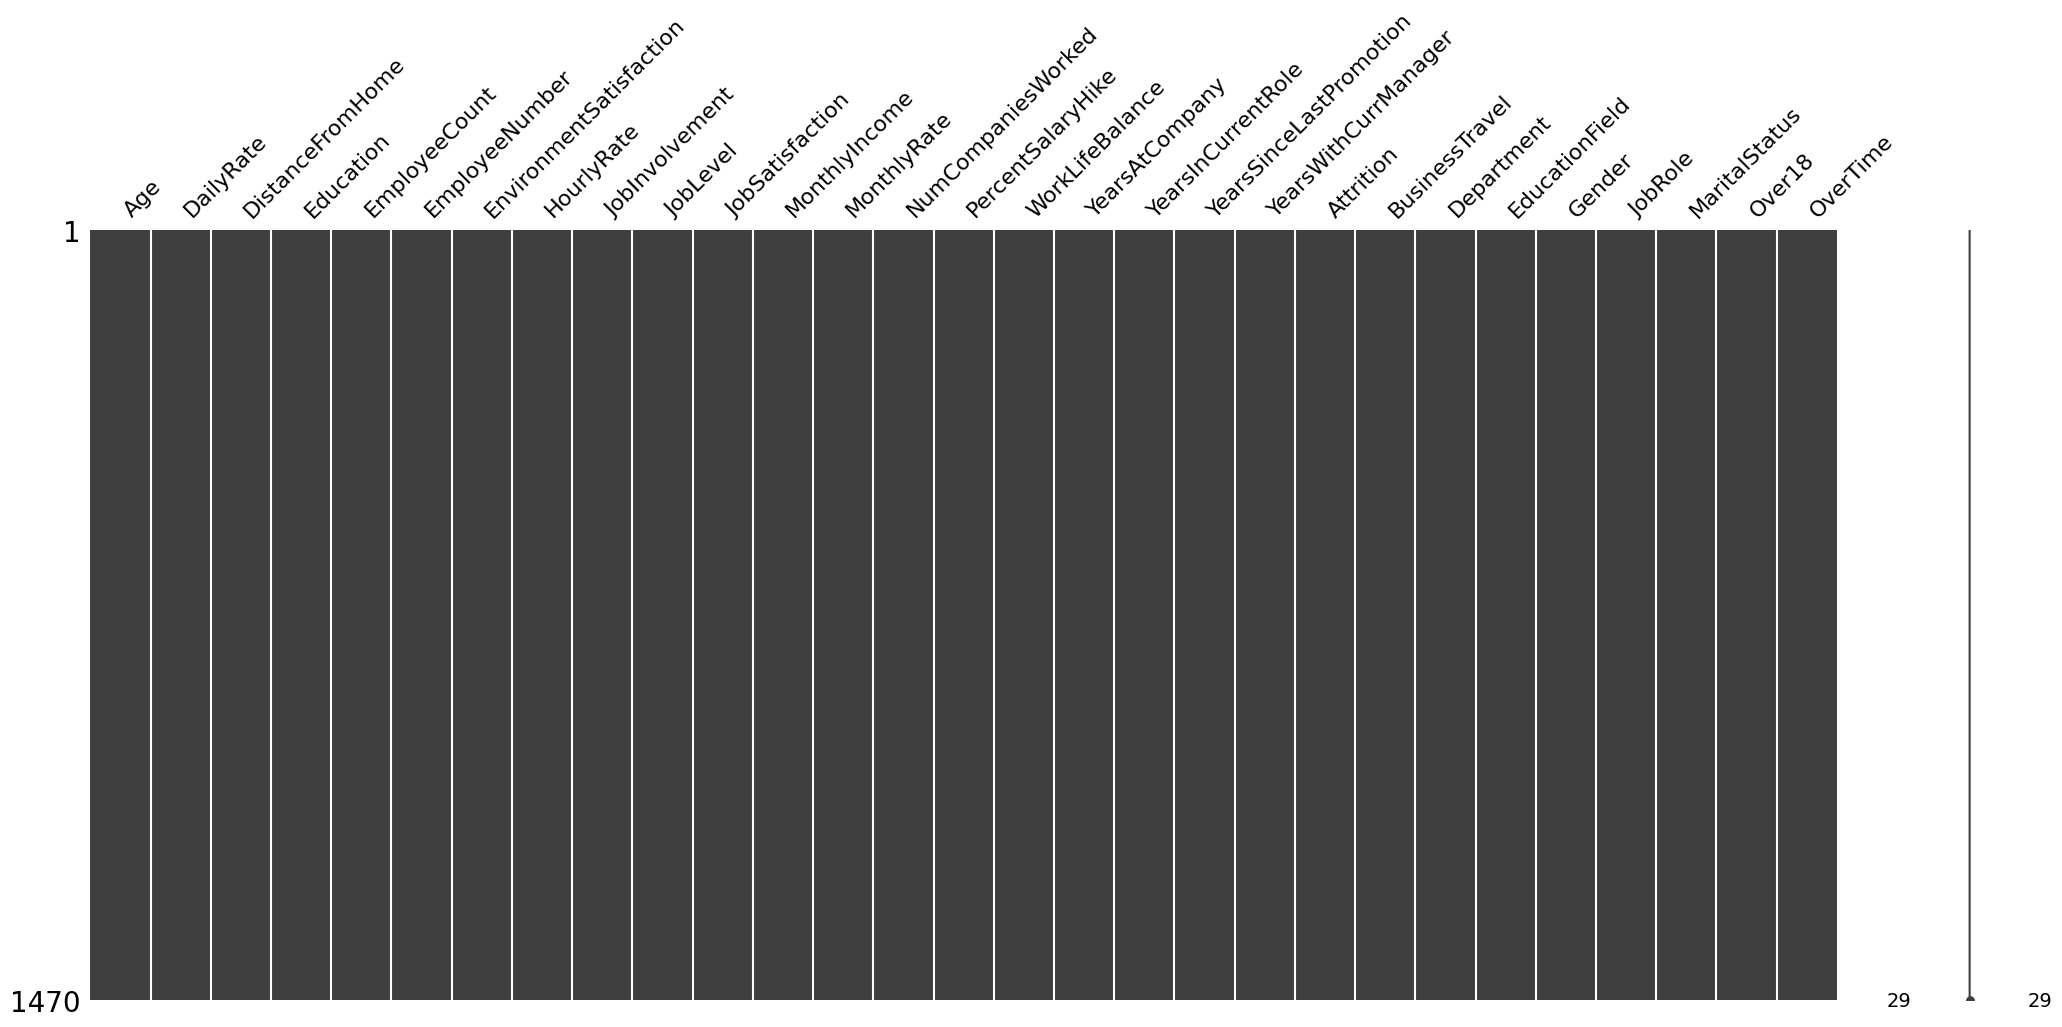

In [45]:
msno.matrix(hr_cleaned)

And now we have a complete, cleaned dataset!